In [27]:
import pandas as pd

file_name = '../data/raw/yelp reviews full.csv'

# Read the CSV file
df = pd.read_csv(file_name, encoding='unicode_escape')

# We only need the 'Restaurant name' and 'Comment' columns
df = df[['Restaurant name', 'Comment', 'Raitng']]
df["Rating"] = df["Raitng"]
df = df.drop("Raitng", axis=1)

/var/folders/v3/hwmt_9nx6nl41f06plb5szqr0000gn/T/ipykernel_6832/2387857064.py:6: DtypeWarning: Columns (0,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding='unicode_escape')


In [28]:
! pip install pandas matplotlib seaborn

/var/folders/v3/hwmt_9nx6nl41f06plb5szqr0000gn/T/ipykernel_6832/3431858810.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


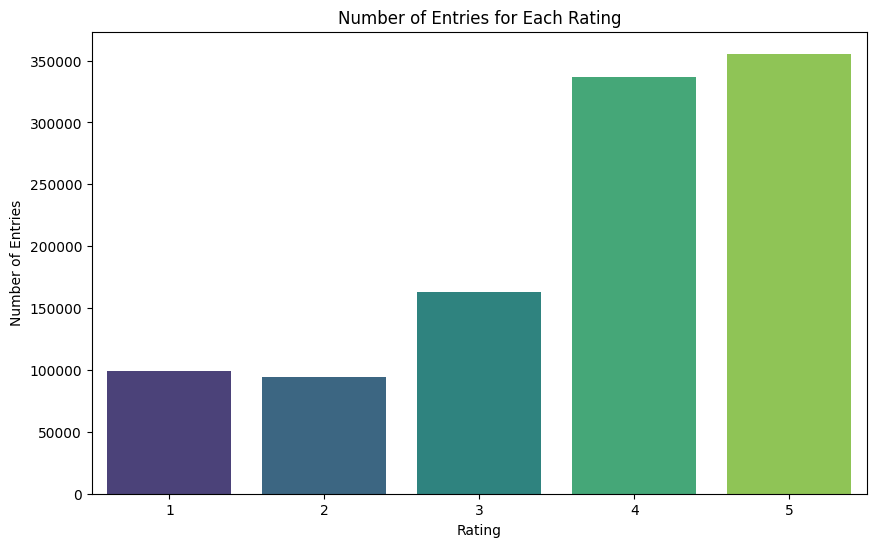

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure that 'Rating' is treated as a categorical variable
df['Rating'] = df['Rating'].astype('category')

# Data Visualization 1: Bar Chart on Number of Entries with Different Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Number of Entries for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Entries')
plt.show()

In [30]:
very_bad_reviews = df[df['Rating'] == 1]

# Print some of these reviews
for index, row in very_bad_reviews.head().iterrows():  # Adjust the number of lines to print as needed
    print(f"Restaurant: {row['Restaurant name']}, Review: {row['Comment']}\n")

Restaurant: 1 Chimi Sushi, Review: very bland rolls...no spice whatsoever in the spicy tuna roll, and no jalapeo spice in the green river roll...yellowtail scallion roll had no scallions! i've had better sushi from the deli at the grocery store. also, delivery was SLOW...i was quoted 25-40 mins, and it took 1:15.

Restaurant: 1 Chimi Sushi, Review: TERRIBLE. Please learn from our experience with Chimi Sushi. We waited almost 2 hours for our food to be delivered, which means that our sushi was warm, our soup was cold, and the gyoza was soggy. I first called Chimi when it had been 1 hour to check on the status of our order since their page said it would take 25-40 minutes. He said his delivery guy was five minutes away. 20 minutes later I called back, and was told the delivery man was one block away. 10 minutes later I called back, asking for a discount/refund and was offered 30% off my next order and was told that the deliver man was in the building. 15 minutes later, when the deliver m

In [31]:
bad_reviews = df[df['Rating'] == 2]

# Print some of these reviews
for index, row in bad_reviews.head().iterrows():  # Adjust the number of lines to print as needed
    print(f"Restaurant: {row['Restaurant name']}, Review: {row['Comment']}\n")

Restaurant: 1 Chimi Sushi, Review: Chimi chimi cocoa pop, chimi chimi rock... Seamless-webbing some sushi up for a late lunch, I probably should have been a bit more wary of the low prices on this menu. For $13 I scored miso soup, edaname, salad, 6 spicy tempura tuna rolls and 6 eel avocado rolls. I guess the strangest thing was that the edaname was $5 of that price tag. The rolls themselves were alright, though I would not call the fish "fresh" when it smells fishy. Both were bland and had to be soaked in soy sauce to be edible. The miso was tasty, I liked the little chunks of tofu though some of the seaweed pieces were a little too mushy if ya know what I mean. Service was quick and friendly, but Chimi proves that age old adage true: you get what you pay for...

Restaurant: 1 Chimi Sushi, Review: Don't know how this place got 5 stars on seamless web... The $14.95 dinner bento box was nothing special. Came with 5 pieces of nigiri, a california roll, a weak iceburg lettuce salad, miso 

/var/folders/v3/hwmt_9nx6nl41f06plb5szqr0000gn/T/ipykernel_6832/3422966949.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='magma')


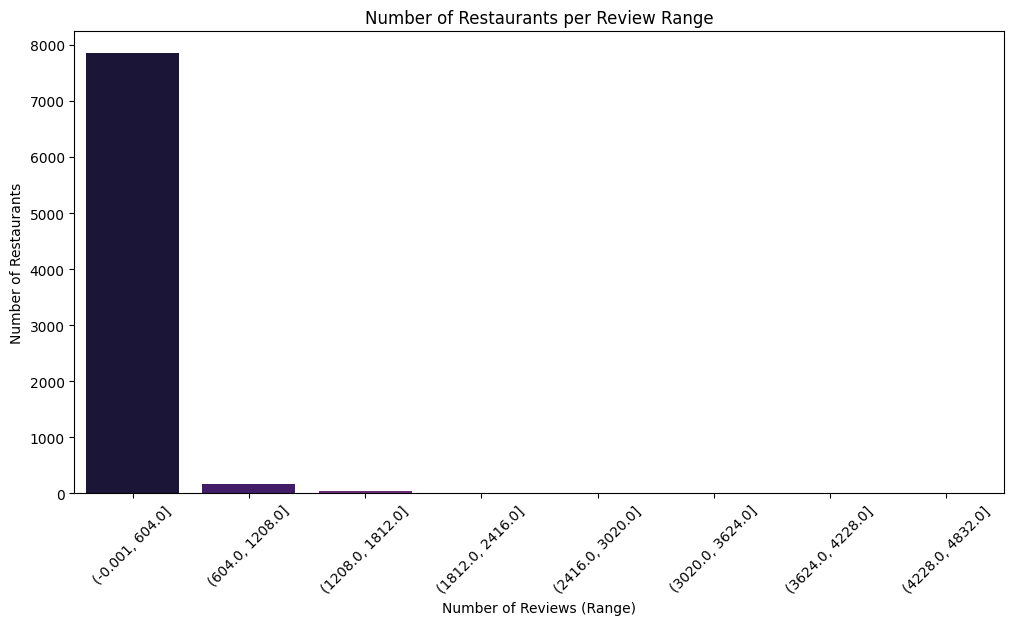

In [33]:
# Counting the number of reviews per restaurant
restaurant_review_counts = df['Restaurant name'].value_counts()

# Grouping these counts into 8 distinct ranges
bins = np.linspace(0, restaurant_review_counts.max(), 9)  # Creates 8 ranges
review_ranges = pd.cut(restaurant_review_counts, bins, include_lowest=True)

# Counting the number of restaurants in each range
range_counts = review_ranges.value_counts().sort_index()

# Data Visualization 2: Bar Chart on Number of Restaurants per Review Range
plt.figure(figsize=(12, 6))
sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='magma')
plt.title('Number of Restaurants per Review Range')
plt.xlabel('Number of Reviews (Range)')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


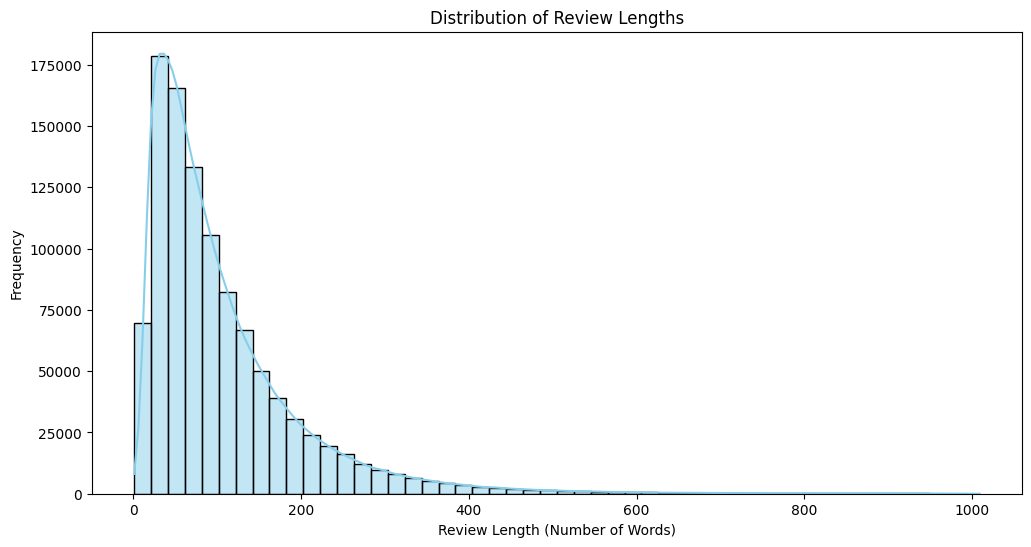

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each review (in terms of number of words)
df['Review Length'] = df['Comment'].apply(lambda x: len(str(x).split()))

# Data Visualization: Histogram of Review Lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['Review Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Filter the DataFrame for reviews with fewer than 20 words
short_reviews = df[df['Review Length'] < 20]

# Print some of these reviews
for index, row in short_reviews.head().iterrows():  # Adjust the number of lines to print as needed
    print(f"Restaurant: {row['Restaurant name']}, Review: {row['Comment']}\n")


Restaurant: 1 Chimi Sushi, Review: Ordered the Chirashi. It was average tasting. It was not bad but nothing worth really writing about.

Restaurant: 1 Republik, Review: Haven't had a bad experience yet. They have pretty decent bar food and good happy hour deals!

Restaurant: 1 Republik, Review: Alia is a constant with food and drinks. I will continue to comeb back for the service and smiles

Restaurant: 1 Republik, Review: Hi Narae, I always come in for the wings...that's my go to dish, although I love the Cobb salad!

Restaurant: 1 Republik, Review: Great bar at night and awesome lunch specials during the day. 1 Republik Burger folks! ONE. REPUBLIK. BURGER!



In [41]:
very_very_short = df[df['Review Length'] < 5]

# Print some of these reviews
for index, row in very_very_short.head().iterrows():  # Adjust the number of lines to print as needed
    print(f"Restaurant: {row['Restaurant name']}, Review: {row['Comment']}\n")

Restaurant: 21 Club, Review: Good

Restaurant: 5th & Mad, Review: #NAME?

Restaurant: A A JING, Review: Ma Po Tofu- delicious

Restaurant: A&J Pizza, Review: Best pizza in queens!!

Restaurant: ABC Cocina, Review: #NAME?



In [42]:
long_reviews = df[df['Review Length'] > 200]

# Print some of these reviews
for index, row in long_reviews.head().iterrows():  # Adjust the number of lines to print as needed
    print(f"Restaurant: {row['Restaurant name']}, Review: {row['Comment']}\n")

Restaurant: 1 Chimi Sushi, Review: TERRIBLE. Please learn from our experience with Chimi Sushi. We waited almost 2 hours for our food to be delivered, which means that our sushi was warm, our soup was cold, and the gyoza was soggy. I first called Chimi when it had been 1 hour to check on the status of our order since their page said it would take 25-40 minutes. He said his delivery guy was five minutes away. 20 minutes later I called back, and was told the delivery man was one block away. 10 minutes later I called back, asking for a discount/refund and was offered 30% off my next order and was told that the deliver man was in the building. 15 minutes later, when the deliver man had still not arrived, we called Chimi once more, asking to simply refund our money/cancel the order. He said that the delivery man would give us cash back for our whole order, we could have the food, and 30% off our next order. 5 minutes later the delivery man finally arrived, said he would not give us the 75 d

In [70]:
# Filter reviews based on rating
df_filtered = df[df['Rating'].isin([1, 2])]

# Calculate the length of each review
df_filtered['Review Length'] = df_filtered['Comment'].apply(lambda x: len(x.split()))

# Further filter reviews based on length
df_filtered = df_filtered[(df_filtered['Review Length'] > 5) & (df_filtered['Review Length'] < 150)]

# Group comments by restaurant and filter based on total review length
grouped_comments = df_filtered.groupby('Restaurant name')['Comment'].apply(lambda x: ' // '.join(x))
grouped_comments = grouped_comments[grouped_comments.apply(len) < 800]

# Convert grouped_comments to DataFrame for merging
grouped_comments_df = grouped_comments.reset_index()
grouped_comments_df.columns = ['Restaurant name', 'Grouped Comments']

# Create a unique DataFrame of restaurants with aggregated attributes
unique_restaurants_df = df.drop_duplicates(subset='Restaurant name')
unique_restaurants_df = unique_restaurants_df.drop(['Comment', 'Rating', 'Review Length'], axis=1)  # Drop 'Comment' and 'Rating'

# Merge the grouped comments with the unique restaurants DataFrame
merged_df = unique_restaurants_df.merge(grouped_comments_df, on='Restaurant name', how='left')

/var/folders/v3/hwmt_9nx6nl41f06plb5szqr0000gn/T/ipykernel_6832/3387893252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Review Length'] = df_filtered['Comment'].apply(lambda x: len(x.split()))


Number of non-null 'Grouped Comments': 1227
Mean length of 'Grouped Comments': 447.90709046454765
Median length of 'Grouped Comments': 445.0
Maximum length of 'Grouped Comments': 799
Minimum length of 'Grouped Comments': 45


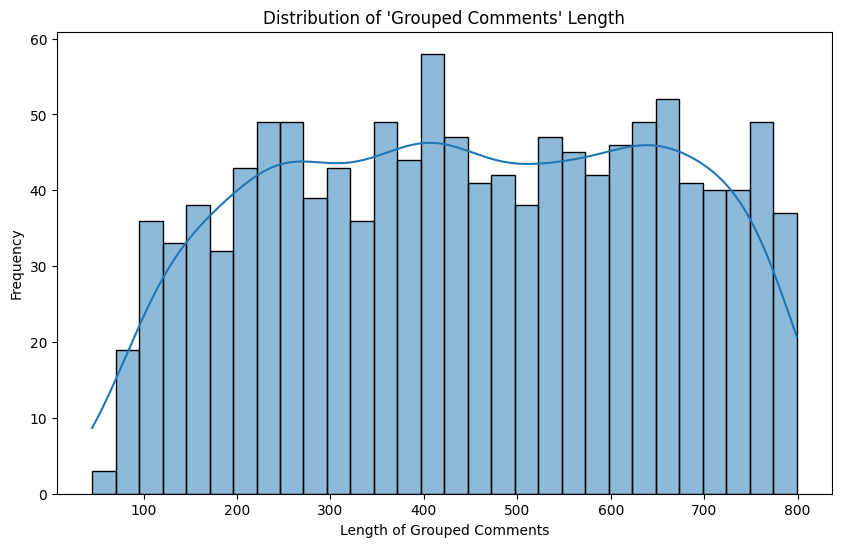

In [71]:
merged_df = merged_df[merged_df["Grouped Comments"].notna()]
# Count the number of non-null rows in 'Grouped Comments'
non_null_count = merged_df['Grouped Comments'].notna().sum()
print(f"Number of non-null 'Grouped Comments': {non_null_count}")

# Calculate the length of each non-null grouped comment
merged_df['Grouped Comments Length'] = merged_df['Grouped Comments'].dropna().apply(len)

# Basic statistics on the length of grouped comments
mean_length = merged_df['Grouped Comments Length'].mean()
median_length = merged_df['Grouped Comments Length'].median()
max_length = merged_df['Grouped Comments Length'].max()
min_length = merged_df['Grouped Comments Length'].min()

print(f"Mean length of 'Grouped Comments': {mean_length}")
print(f"Median length of 'Grouped Comments': {median_length}")
print(f"Maximum length of 'Grouped Comments': {max_length}")
print(f"Minimum length of 'Grouped Comments': {min_length}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Grouped Comments Length'].dropna(), bins=30, kde=True)
plt.title("Distribution of 'Grouped Comments' Length")
plt.xlabel('Length of Grouped Comments')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI()

def summarize_comments(comments):
    # Concatenate comments into a single text
    text = ' // '.join(comments)

    # Prepare the messages for the API call
    messages = [
        {"role": "system", "content": "You are a helpful assistant for the restaurant owner."},
        {"role": "user", "content": f"Summarize the following restaurant customer reviews separated by '//' into actionable insights in bullet points: {text}"}
    ]

    # Making an API call to OpenAI
    response = client.chat.completions.create(
        model="gpt-4-1106-preview",
        messages=messages
    )

    # Extracting the GPT-generated response
    gpt_output = response.choices[0].message.content
    return gpt_output

# New DataFrame for storing the results
new_df = pd.DataFrame(columns=['Restaurant Name', 'Combined Comments', 'Summary'])

# NOTE! This can only run about 900 rows/1200 rows due to single day token usage on openai
for _, row in merged_df.iterrows():
    name, comment = row["Restaurant name"], row["Grouped Comments"]
    gpt_output = summarize_comments(comment)
    new_df = new_df._append({
        'Restaurant Name': name,
        'Combined Comments': comment, 
        'Summary': gpt_output
    }, ignore_index=True)

In [96]:
new_df.to_csv('../data/processed/summarized_insights.csv', index=False)

In [95]:
new_df

,Restaurant Name,Combined Comments,Summary
0,1017 Deli,"Never ever ever come here. The ""buffet"" mede me sick not once but twice. How about inconsistent pricing ,depending on who's behind the counter. I'm going to suggest that when you order food monitor closely how they are preparing it. Because the chick behind the counter tried to make my food without gloves and then go back to moving dusty produce. Eh this place will no longer my my $$. I'm so disgusted!","- Ensure food quality meets safety standards to prevent customer illness. Multiple reports of sickness from the buffet need immediate investigation and rectification.\n- Standardize pricing and eliminate any perception of arbitrary or inconsistent charges.\n- Implement strict hygiene protocols for staff preparing food, including mandatory glove use.\n- Monitor kitchen staff closely to ensure adherence to food safety and hygiene standards, especially when switching tasks.\n- Address any issues related to storage and handling of ingredients, particularly concerning dust and cleanliness.\n- Take corrective measures to restore customer confidence and retain their business, as current practices have led to a decision not to return or spend money at the establishment."
1,11 Hanover Greek,"Absolutely absurd pricing for very average food. If there prices were in line with the quality - they might have a fighting change but $36.00 for an average piece of halibut - come on. $36.00 is utterly absurd. I agree - don't waste your money. Will NOT go back! // Overpriced Greek restaurant, with 16$ drinks, loud music to the point where you can't talk, average food, and average staff...your call if you want to give it a try.","- Review the pricing strategy, as customers find the current prices too high for the quality of food being served (specific complaint about a $36.00 halibut).\n- Consider adjusting prices to better match the perceived value of the food.\n- Reassess the volume of the music; customers are finding it too loud to have conversations.\n- Reevaluate beverage pricing, as a $16 drink price point was explicitly mentioned as being overpriced.\n- Assess the overall dining experience, including the quality of food and service, as customers are rating them as average.\n- Make an effort to distinguish the restaurant through improvements, as customers are not motivated to return under current conditions.\n- Given the feedback, the restaurant might benefit from refining its concept to provide better value or a more exceptional experience to justify the price points."
2,118 Kitchen,"I was walking in the neighborhood and saw this place and craving for bubble tea. Since i havent ate i ordered avocado rolls and quesadilla. What a disapointment. Instead of peppers in my quesadilla i got cabbage cheese and mushroom. The tapiocas were mushy outside and raw in the center. Only the avocado roll was good. If you try out this place , i advise not getting their bubble tea and veg. Quesadilla","- Consider revising the recipe or presentation of the quesadilla to ensure it contains the correct ingredients (peppers were expected but not included).\n- Inspect and address potential quality control issues with the tapioca pearls used in bubble tea, focusing on consistency (avoiding a mushy outside or raw center).\n- Further investigate and improve the preparation process of the vegetable quesadilla to match customer expectations.\n- Maintain the quality of the avocado rolls, as they received positive feedback.\n- Consider customer feedback when making decisions about menu offerings or improving existing items.\n- Communicate with the kitchen staff to ensure all dishes are prepared to standard and correctly topped with the advertised ingredients."
3,129 Gourmet Deli,"Ordered a chicken club panini from meal pass today. I arrive with the mealpass sign on the counter but they have no idea what the meal of the day is or what food should be ready for me. They then make me wait in line with everyone else and

In [102]:
df_combined

,Restaurant Name,Combined Comments,Summary
0,1017 Deli,"Never ever ever come here. The ""buffet"" mede me sick not once but twice. How about inconsistent pricing ,depending on who's behind the counter. I'm going to suggest that when you order food monitor closely how they are preparing it. Because the chick behind the counter tried to make my food without gloves and then go back to moving dusty produce. Eh this place will no longer my my $$. I'm so disgusted!","- Ensure food quality meets safety standards to prevent customer illness. Multiple reports of sickness from the buffet need immediate investigation and rectification.\n- Standardize pricing and eliminate any perception of arbitrary or inconsistent charges.\n- Implement strict hygiene protocols for staff preparing food, including mandatory glove use.\n- Monitor kitchen staff closely to ensure adherence to food safety and hygiene standards, especially when switching tasks.\n- Address any issues related to storage and handling of ingredients, particularly concerning dust and cleanliness.\n- Take corrective measures to restore customer confidence and retain their business, as current practices have led to a decision not to return or spend money at the establishment."
1,11 Hanover Greek,"Absolutely absurd pricing for very average food. If there prices were in line with the quality - they might have a fighting change but $36.00 for an average piece of halibut - come on. $36.00 is utterly absurd. I agree - don't waste your money. Will NOT go back! // Overpriced Greek restaurant, with 16$ drinks, loud music to the point where you can't talk, average food, and average staff...your call if you want to give it a try.","- Review the pricing strategy, as customers find the current prices too high for the quality of food being served (specific complaint about a $36.00 halibut).\n- Consider adjusting prices to better match the perceived value of the food.\n- Reassess the volume of the music; customers are finding it too loud to have conversations.\n- Reevaluate beverage pricing, as a $16 drink price point was explicitly mentioned as being overpriced.\n- Assess the overall dining experience, including the quality of food and service, as customers are rating them as average.\n- Make an effort to distinguish the restaurant through improvements, as customers are not motivated to return under current conditions.\n- Given the feedback, the restaurant might benefit from refining its concept to provide better value or a more exceptional experience to justify the price points."
2,118 Kitchen,"I was walking in the neighborhood and saw this place and craving for bubble tea. Since i havent ate i ordered avocado rolls and quesadilla. What a disapointment. Instead of peppers in my quesadilla i got cabbage cheese and mushroom. The tapiocas were mushy outside and raw in the center. Only the avocado roll was good. If you try out this place , i advise not getting their bubble tea and veg. Quesadilla","- Consider revising the recipe or presentation of the quesadilla to ensure it contains the correct ingredients (peppers were expected but not included).\n- Inspect and address potential quality control issues with the tapioca pearls used in bubble tea, focusing on consistency (avoiding a mushy outside or raw center).\n- Further investigate and improve the preparation process of the vegetable quesadilla to match customer expectations.\n- Maintain the quality of the avocado rolls, as they received positive feedback.\n- Consider customer feedback when making decisions about menu offerings or improving existing items.\n- Communicate with the kitchen staff to ensure all dishes are prepared to standard and correctly topped with the advertised ingredients."
3,129 Gourmet Deli,"Ordered a chicken club panini from meal pass today. I arrive with the mealpass sign on the counter but they have no idea what the meal of the day is or what food should be ready for me. They then make me wait in line with everyone else and

In [103]:
new_df

,Restaurant Name,Combined Comments,Summary
0,1017 Deli,"Never ever ever come here. The ""buffet"" mede me sick not once but twice. How about inconsistent pricing ,depending on who's behind the counter. I'm going to suggest that when you order food monitor closely how they are preparing it. Because the chick behind the counter tried to make my food without gloves and then go back to moving dusty produce. Eh this place will no longer my my $$. I'm so disgusted!","- Ensure food quality meets safety standards to prevent customer illness. Multiple reports of sickness from the buffet need immediate investigation and rectification.\n- Standardize pricing and eliminate any perception of arbitrary or inconsistent charges.\n- Implement strict hygiene protocols for staff preparing food, including mandatory glove use.\n- Monitor kitchen staff closely to ensure adherence to food safety and hygiene standards, especially when switching tasks.\n- Address any issues related to storage and handling of ingredients, particularly concerning dust and cleanliness.\n- Take corrective measures to restore customer confidence and retain their business, as current practices have led to a decision not to return or spend money at the establishment."
1,11 Hanover Greek,"Absolutely absurd pricing for very average food. If there prices were in line with the quality - they might have a fighting change but $36.00 for an average piece of halibut - come on. $36.00 is utterly absurd. I agree - don't waste your money. Will NOT go back! // Overpriced Greek restaurant, with 16$ drinks, loud music to the point where you can't talk, average food, and average staff...your call if you want to give it a try.","- Review the pricing strategy, as customers find the current prices too high for the quality of food being served (specific complaint about a $36.00 halibut).\n- Consider adjusting prices to better match the perceived value of the food.\n- Reassess the volume of the music; customers are finding it too loud to have conversations.\n- Reevaluate beverage pricing, as a $16 drink price point was explicitly mentioned as being overpriced.\n- Assess the overall dining experience, including the quality of food and service, as customers are rating them as average.\n- Make an effort to distinguish the restaurant through improvements, as customers are not motivated to return under current conditions.\n- Given the feedback, the restaurant might benefit from refining its concept to provide better value or a more exceptional experience to justify the price points."
2,118 Kitchen,"I was walking in the neighborhood and saw this place and craving for bubble tea. Since i havent ate i ordered avocado rolls and quesadilla. What a disapointment. Instead of peppers in my quesadilla i got cabbage cheese and mushroom. The tapiocas were mushy outside and raw in the center. Only the avocado roll was good. If you try out this place , i advise not getting their bubble tea and veg. Quesadilla","- Consider revising the recipe or presentation of the quesadilla to ensure it contains the correct ingredients (peppers were expected but not included).\n- Inspect and address potential quality control issues with the tapioca pearls used in bubble tea, focusing on consistency (avoiding a mushy outside or raw center).\n- Further investigate and improve the preparation process of the vegetable quesadilla to match customer expectations.\n- Maintain the quality of the avocado rolls, as they received positive feedback.\n- Consider customer feedback when making decisions about menu offerings or improving existing items.\n- Communicate with the kitchen staff to ensure all dishes are prepared to standard and correctly topped with the advertised ingredients."
3,129 Gourmet Deli,"Ordered a chicken club panini from meal pass today. I arrive with the mealpass sign on the counter but they have no idea what the meal of the day is or what food should be ready for me. They then make me wait in line with everyone else and